In [ ]:
import os 
import copy
import pickle
from IPython.display import clear_output
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.grid'] = False

import math 
import numpy as np
from collections import OrderedDict
import itertools

import papermill as pm

In [2]:
data_strings = ['mnist'] #,'svhn']

In [3]:
def get_path(layer_dims, data_str='mnist', prefix_str='weights', reg_eta = None, layer_index = None, dataset_percentage=1.0, pretrain_ratio=0.0):
    # prefix_str should be either - weights, training
    # path = './COLT_saved/mnist/500_500/base_reg_0d00_datasetp_0d8'
    folder_path = './COLT_saved/' + data_str + '/'
    
    layer_string=''
    for item in layer_dims:
        if layer_string == '':
            layer_string += str(item) 
        else:
            layer_string += '_' + str(item) 
    folder_path += layer_string + '/base'
    
    if pretrain_ratio > 0.0:
        pretrain_str = f'_{pretrain_ratio:.2f}'
        folder_path += '_pretrain' + pretrain_str.replace('.','d')
        
    if reg_eta is not None:
        reg_eta_str = f'_{reg_eta:.2f}'
        folder_path += '_reg' + reg_eta_str.replace('.','d')
    else:
        folder_path += '_zeroreg'
    
    dp_str = f'_{dataset_percentage:.2f}'
    folder_path += '_datasetp' + dp_str.replace('.','d')
    
    isExist = os.path.exists(folder_path)
    if not isExist:
       # Create a new directory because it does not exist
       os.makedirs(folder_path)
    
    suffix_str = None
    if prefix_str == 'weights':
        suffix_str = '.pth' 
    elif prefix_str == 'training' or prefix_str == 'lipschitz' or prefix_str == 'radius':
        suffix_str = '.pdf'
    elif prefix_str == 'generalization_info':
        suffix_str = ''
    
    if suffix_str is None:
        raise ValueError(f'Invalid prefix string, given {prefix_str} but valid options = weights / training / generalization_info / radius / lipschitz')
    
    if prefix_str == 'radius':
        assert layer_index is not None
        prefix_str += '_layer' + str(layer_index)
    
    file_path = ''
    file_path += prefix_str  
    file_path += suffix_str
    
    return os.path.join(folder_path,file_path)
    

## Experiment stencil
- Compute generalization bounds for networks of different widths and depths 

[comment]: # ([100], [500], [1000], [2000] and same width but multiple depths : [100], [100,100], [100,100,100], [500, 500], [500, 500, 500], [1000, 1000], [1000, 1000, 1000])

| dims | dims | dims|
| -------- | ------- | ------- |
|100    | 500  |1000 |
|100, 100 | 500, 500 | 1000, 1000 |
|100, 100, 100 | 500, 500, 500 | 1000, 1000, 1000 |

- Generalization bound for across training dataset sizes (via dataset_percentage) for 3 categories :
    - Data-independent prior and no regularization
    - Data-independent prior and Close-to-initialization regularization
    - Data-dependent prior and close-to-initialization regularization
    
- Effective Stable Sparsity across training data set for different widths and perturbation 
    -  For each data point, for each perturbation level epsilon, choose layer-wise sparsity s_k at which the radius is sufficiently large. 
    - Plot the effective reduced dimensionality across inputs : \sum_{k} (d_k-s_k)(d_{k-1}-s_{k-1}) / \sum_k d_k d_{k-1} across epsilon and different networks of different widths and depths. 

## Generalization study

In [4]:
layer_dims_1 = [
    #[10],
    #[50],
    #[100],
    [500],
    [1000]
]

layer_dims_2 = [
    #[10, 10],
    [50, 50],
    [100, 100],
    [500, 500],
    [1000, 1000]
]

layer_dims_3 = [
    #[10, 10, 10],
    [50, 50, 50],
    [100, 100, 100],
    [500, 500, 500],
    [1000, 1000, 1000]
]

dataset_p = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1.0
]

prod_1 = itertools.product(layer_dims_1, dataset_p) 
prod_2 = itertools.product(layer_dims_2, dataset_p) 
prod_3 = itertools.product(layer_dims_3, dataset_p) 

In [ ]:
for choice in prod_1:
    print(f'Executing with layer_dims = {choice[0]}, dataset_p = {choice[1]}')
    
    for data_str in data_strings: 
        print(f'Running on {data_str.upper()}')
        if choice[0] == [500] and choice[1] < 0.5:
            continue
            
        pm.execute_notebook(
            './COLT-Generalization' + '.ipynb',
            './COLT-output_generalization' + data_str + '.ipynb',
            parameters=dict(layer_dims = choice[0], dataset_percentage = choice[1])
        )

Black is not installed, parameters wont be formatted


Executing with layer_dims = [500], dataset_p = 0.1
Running on MNIST
Executing with layer_dims = [500], dataset_p = 0.2
Running on MNIST
Executing with layer_dims = [500], dataset_p = 0.3
Running on MNIST
Executing with layer_dims = [500], dataset_p = 0.4
Running on MNIST
Executing with layer_dims = [500], dataset_p = 0.5
Running on MNIST


Executing: 100%|████████████████████████████████████████████████████████████████████████| 66/66 [1:11:12<00:00, 64.73s/cell]
Black is not installed, parameters wont be formatted


Executing with layer_dims = [500], dataset_p = 0.6
Running on MNIST


Executing:  94%|█████████████████████████████████████████████████████████████████████▌    | 62/66 [04:27<00:04,  1.17s/cell]

In [ ]:
for choice in prod_2:
    print(f'Executing with layer_dims = {choice[0]}, dataset_p = {choice[1]}')
    
    for data_str in data_strings: 
        print(f'Running on {data_str.upper()}')
        pm.execute_notebook(
            './COLT-Generalization' + '.ipynb',
            './COLT-output_generalization' + data_str + '.ipynb',
            parameters=dict(layer_dims = choice[0], dataset_percentage = choice[1])
        )

In [ ]:
for choice in prod_3:
    print(f'Executing with layer_dims = {choice[0]}, dataset_p = {choice[1]}')
    
    for data_str in data_strings: 
        print(f'Running on {data_str.upper()}')
        pm.execute_notebook(
            './COLT-Generalization' + '.ipynb',
            './COLT-output_generalization' + data_str + '.ipynb',
            parameters=dict(layer_dims = choice[0], dataset_percentage = choice[1])
        )

In [17]:
dataset_p = [
0.2,
0.4,
0.6,
0.8,
1.0]

layer_dims = [100]

reg_eta = 1.0

pretrain_ratio=0.0
expand_ratio = 1
dataset_percentage = 1.0
batch_size = 100
num_epsilon = 30
num_alpha = 10
epsilon_max = 1.0
epsilon_min = 0.001
alpha_max = 1.0
alpha_min = 0.0
pretrain_ratio = 0.05
adv_train = False
saved = False
colab = False

if pretrain_ratio > 0.0:
    eps_grid = np.linspace(epsilon_min, epsilon_max/10, num_epsilon)
else:
    eps_grid = np.linspace(10*epsilon_min, epsilon_max, num_epsilon)

alpha_grid = np.linspace(alpha_min+0.001, alpha_max, num_alpha)

mnist_size = 55000
            
data_str = 'mnist' 
folder_path = './saved/' + data_str +'/'
    
layer_string=''
for item in layer_dims:
    if layer_string == '':
        layer_string += str(item) 
    else:
        layer_string += '_' + str(item) 
folder_path += layer_string + '/'

generalization_info_path = []
generalization_info_path_reg = []
generalization_info_path_pt = []
data_sizes = []
    
for dp in dataset_p: 
    #if dp > 0.5: continue 
    info_path = get_path(layer_dims, adv_train=adv_train, data_str = data_str, prefix_str = 'generalization_info', reg_eta = None, dataset_percentage=dp, expand_ratio=1) 
    print(info_path)
    generalization_info_path.append(info_path)
    info_path_reg = get_path(layer_dims, adv_train=adv_train, data_str = data_str, prefix_str = 'generalization_info', reg_eta = 1.0, dataset_percentage=dp, expand_ratio=1) 
    print(info_path_reg)
    generalization_info_path_reg.append(info_path_reg)
    info_path_pt = get_path(layer_dims, adv_train=adv_train, data_str = data_str, prefix_str = 'generalization_info', reg_eta = 100, dataset_percentage=dp, expand_ratio=1, pretrain_ratio=pretrain_ratio) 
    print(info_path_pt)
    generalization_info_path_pt.append(info_path_pt)
    adjusted_size = int(dp*mnist_size)
    data_sizes.append(adjusted_size)
    print(adjusted_size)
    
vacuous = [1]*len(data_sizes)
    

generalization_info = [None]*len(generalization_info_path)
best_bound = [0]*len(generalization_info_path)
best_eps = [0]*len(generalization_info_path)
best_alpha = [0]*len(generalization_info_path)
    
best_zero_bound = [0]*len(generalization_info_path)
best_zero_eps = [0]*len(generalization_info_path)
    
best_sparse_bound = [0]*len(generalization_info_path)
best_sparse_eps = [0]*len(generalization_info_path)
best_sparse_alpha = [0]*len(generalization_info_path)
sparse_eps_key = [0]*len(generalization_info_path)
sparse_alpha_key = [0]*len(generalization_info_path)
all_test_error = [0]*len(generalization_info_path)
        
gen_grids = []
plot_loc = folder_path + '/generalization_bound_vs_datasize_mnist_no_reg_no_prior.pdf'
    
    
# --- with reg 
generalization_info_reg = [None]*len(generalization_info_path_reg)
best_bound_reg = [0]*len(generalization_info_path_reg)
best_eps_reg = [0]*len(generalization_info_path_reg)
best_alpha_reg = [0]*len(generalization_info_path_reg)
    
best_zero_bound_reg = [0]*len(generalization_info_path_reg)
best_zero_eps_reg = [0]*len(generalization_info_path_reg)
    
best_sparse_bound_reg = [0]*len(generalization_info_path_reg)
best_sparse_eps_reg = [0]*len(generalization_info_path_reg)
best_sparse_alpha_reg = [0]*len(generalization_info_path_reg)
sparse_eps_key_reg = [0]*len(generalization_info_path_reg)
sparse_alpha_key_reg = [0]*len(generalization_info_path_reg)
all_test_error_reg = [0]*len(generalization_info_path_reg)
       
gen_grids_reg = []
plot_loc_reg = folder_path + '/generalization_bound_vs_datasize_mnist_reg1d0_no_prior.pdf'
 
# ---- with pt
generalization_info_pt = [None]*len(generalization_info_path_pt)
best_bound_pt = [0]*len(generalization_info_path_pt)
best_eps_pt = [0]*len(generalization_info_path_pt)
best_alpha_pt = [0]*len(generalization_info_path_pt)
    
best_zero_bound_pt = [0]*len(generalization_info_path_pt)
best_zero_eps_pt = [0]*len(generalization_info_path_pt)
    
best_sparse_bound_pt = [0]*len(generalization_info_path_pt)
best_sparse_eps_pt = [0]*len(generalization_info_path_pt)
best_sparse_alpha_pt = [0]*len(generalization_info_path_pt)
sparse_eps_key_pt = [0]*len(generalization_info_path_pt)
sparse_alpha_key_pt = [0]*len(generalization_info_path_pt)
all_test_error_pt = [0]*len(generalization_info_path_pt)
        
gen_grids_pt = []
plot_loc_pt = folder_path + '/generalization_bound_vs_datasize_mnist_withprior.pdf'
    

for (index,p) in enumerate(generalization_info_path):
    with open(p, 'rb') as handle:
        generalization_info[index] = pickle.load(handle)
    
for (index,p) in enumerate(generalization_info_path_reg):
    with open(p, 'rb') as handle:
        generalization_info_reg[index] = pickle.load(handle)

for (index,p) in enumerate(generalization_info_path_pt):
    with open(p, 'rb') as handle:
        generalization_info_pt[index] = pickle.load(handle)

        
for index in range(len(generalization_info_path)):
    test_error = generalization_info[index]['test_error']
    train_error = generalization_info[index]['train_error']
    zero_sparse_grid = generalization_info[index]['zero_sparse_grid'] 
    generalization_grid = generalization_info[index]['generalization_grid'] 
    all_test_error[index] = test_error.detach().cpu()
        
    zero_bound = np.inf
    zero_eps_key = 0
    for eps_index in range(num_epsilon):
        if zero_sparse_grid[eps_index] < zero_bound:
            zero_bound = zero_sparse_grid[eps_index]
            zero_eps_key = eps_index
    best_zero_bound[index] = zero_bound
    best_zero_eps[index] = eps_grid[zero_eps_key]
        
    sparse_bound = np.inf
    for eps_index in range(num_epsilon):
        for alpha_index in range(num_alpha):
            if generalization_grid[eps_index, alpha_index] < sparse_bound:
                sparse_bound = generalization_grid[eps_index, alpha_index]
                sparse_eps_key_reg[index] = eps_index
                sparse_alpha_key_reg[index] = alpha_index
    best_sparse_bound[index] = sparse_bound
    best_sparse_eps[index] = eps_grid[sparse_eps_key[index]]
    best_sparse_alpha[index] = alpha_grid[sparse_alpha_key[index]] 
        
    if best_zero_bound[index] < best_sparse_bound[index]:
        best_bound[index] = best_zero_bound[index]
        best_eps[index] = best_zero_eps[index]
        best_alpha[index] = -1
        
        
print("zero")
print(best_zero_bound)
print(best_zero_eps)
print("sparse")
print(best_sparse_bound)
print(best_sparse_eps)
print(best_sparse_alpha)
layer_index = 0
    
if len(layer_dims) == 1:
    C=400
    C_str = r'$\frac{400}{\sqrt{m}}$' 
    
print('template')
print(C)
template = [C/math.sqrt(x) for x in data_sizes]
print(template) 
    
print("printing best zero bounds")
print(best_zero_bound) 
print("printing best bounds")
print(best_bound) 

for index in range(len(generalization_info_path_reg)):
    test_error = generalization_info_reg[index]['test_error']
    train_error = generalization_info_reg[index]['train_error']
    zero_sparse_grid = generalization_info_reg[index]['zero_sparse_grid'] 
    generalization_grid = generalization_info_reg[index]['generalization_grid'] 
    all_test_error_reg[index] = test_error.detach().cpu()

        
    zero_bound = np.inf
    zero_eps_key = 0
    for eps_index in range(num_epsilon):
        if zero_sparse_grid[eps_index] < zero_bound:
            zero_bound = zero_sparse_grid[eps_index]
            zero_eps_key = eps_index
    best_zero_bound_reg[index] = zero_bound
    best_zero_eps_reg[index] = eps_grid[zero_eps_key]
        
    sparse_bound = np.inf
    for eps_index in range(num_epsilon):
        for alpha_index in range(num_alpha):
            if generalization_grid[eps_index, alpha_index] < sparse_bound:
                sparse_bound = generalization_grid[eps_index, alpha_index]
                sparse_eps_key[index] = eps_index
                sparse_alpha_key[index] = alpha_index
    best_sparse_bound_reg[index] = sparse_bound
    best_sparse_eps_reg[index] = eps_grid[sparse_eps_key[index]]
    best_sparse_alpha_reg[index] = alpha_grid[sparse_alpha_key[index]] 
        
    if best_zero_bound_reg[index] < best_sparse_bound_reg[index]:
        best_bound_reg[index] = best_zero_bound_reg[index]
        best_eps_reg[index] = best_zero_eps_reg[index]
        best_alpha_reg[index] = -1
        
        
print("zero")
print(best_zero_bound_reg)
print(best_zero_eps_reg)
print("sparse")
print(best_sparse_bound_reg)
print(best_sparse_eps_reg)
print(best_sparse_alpha_reg)
layer_index = 0
    
if len(layer_dims) == 1:
    C_reg=400
    C_reg_str = r'$\frac{400}{\sqrt{m}}$' 
    
print('template')
print(C_reg)
template_reg = [C/math.sqrt(x) for x in data_sizes]
print(template_reg) 
    
print("printing best zero bounds")
print(best_zero_bound_reg) 
print("printing best bounds")
print(best_bound_reg) 

for index in range(len(generalization_info_path_pt)):
    test_error_pt = generalization_info_pt[index]['test_error']
    train_error_pt = generalization_info_pt[index]['train_error']
    zero_sparse_grid_pt = generalization_info_pt[index]['zero_sparse_grid'] 
    generalization_grid_pt = generalization_info_pt[index]['generalization_grid'] 
    all_test_error_pt[index] = test_error_pt.detach().cpu()
        
    zero_bound = np.inf
    zero_eps_key = 0
    for eps_index in range(num_epsilon):
        if zero_sparse_grid_pt[eps_index] < zero_bound:
            zero_bound = zero_sparse_grid_pt[eps_index]
            zero_eps_key = eps_index
    best_zero_bound_pt[index] = zero_bound
    best_zero_eps_pt[index] = eps_grid[zero_eps_key]
        
    sparse_bound_pt = np.inf
    for eps_index in range(num_epsilon):
        for alpha_index in range(num_alpha):
            if generalization_grid_pt[eps_index, alpha_index] < sparse_bound_pt:
                sparse_bound_pt = generalization_grid_pt[eps_index, alpha_index]
                sparse_eps_key_pt[index] = eps_index
                sparse_alpha_key_pt[index] = alpha_index
    best_sparse_bound_pt[index] = sparse_bound_pt
    best_sparse_eps_pt[index] = eps_grid[sparse_eps_key[index]]
    best_sparse_alpha_pt[index] = alpha_grid[sparse_alpha_key[index]] 
        
    if best_zero_bound_pt[index] < best_sparse_bound_pt[index]:
        best_bound_pt[index] = best_zero_bound_pt[index]
        best_eps_pt[index] = best_zero_eps_pt[index]
        best_alpha_pt[index] = -1
        
        
print("zero")
print(best_zero_bound_pt)
print(best_zero_eps_pt)
print("sparse")
print(best_sparse_bound_pt)
print(best_sparse_eps_pt)
print(best_sparse_alpha_pt)
layer_index = 0
    
if len(layer_dims) == 1:
    C_pt=400
    C_str_pt = r'$\frac{400}{\sqrt{m}}$' 
    
print('template')
print(C_pt)
template_pt = [C_pt/math.sqrt(x) for x in data_sizes]
print(template_pt) 
    
print("printing best zero bounds")
print(best_zero_bound_pt) 
print("printing best bounds")
print(best_bound_pt) 

    

./saved/mnist/100/normal_zeroreg_datasetp_0d20_expandr_1/generalization_info
./saved/mnist/100/normal_orthoreg_1d00_datasetp_0d20_expandr_1/generalization_info
./saved/mnist/100/normal_pretrain_0d05_orthoreg_100d00_datasetp_0d20_expandr_1/generalization_info
11000
./saved/mnist/100/normal_zeroreg_datasetp_0d40_expandr_1/generalization_info
./saved/mnist/100/normal_orthoreg_1d00_datasetp_0d40_expandr_1/generalization_info
./saved/mnist/100/normal_pretrain_0d05_orthoreg_100d00_datasetp_0d40_expandr_1/generalization_info
22000
./saved/mnist/100/normal_zeroreg_datasetp_0d60_expandr_1/generalization_info
./saved/mnist/100/normal_orthoreg_1d00_datasetp_0d60_expandr_1/generalization_info
./saved/mnist/100/normal_pretrain_0d05_orthoreg_100d00_datasetp_0d60_expandr_1/generalization_info
33000
./saved/mnist/100/normal_zeroreg_datasetp_0d80_expandr_1/generalization_info
./saved/mnist/100/normal_orthoreg_1d00_datasetp_0d80_expandr_1/generalization_info
./saved/mnist/100/normal_pretrain_0d05_orthor

In [15]:
t = [x-0.13 for x in best_zero_bound_pt]
t

[0.9936196756362915,
 0.9514058780670166,
 0.9381817531585693,
 0.927353138923645,
 0.9188362312316894]

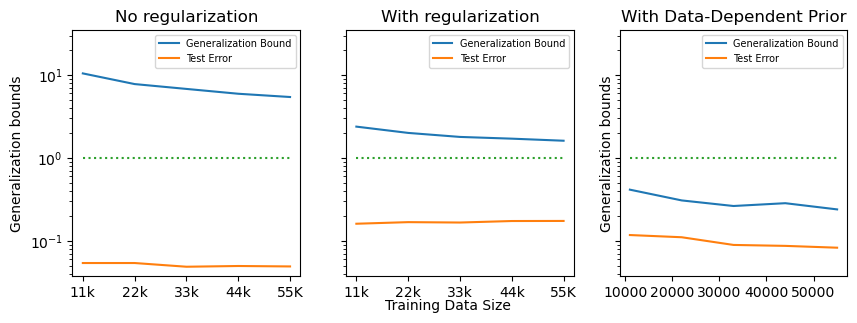

In [19]:
ratio = [x/55000 for x in data_sizes]
plot_loc = folder_path + 'generalization_bound_vs_datasize_mnist_no_prior.pdf'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10,3.2))
#fig.suptitle(f'Generalization Bounds for {len(layer_dims)+1} Layer network of widths = {layer_dims}')
ax1.plot(data_sizes, best_zero_bound, label=f'Generalization Bound') 
#ax1.plot(data_sizes, template, linestyle='dashed', label=C_str) 
ax1.plot(data_sizes, all_test_error, label=r'Test Error')
ax1.plot(data_sizes, vacuous, linestyle='dotted')
ax1.set_ylabel(r'Generalization bounds')
ax1.set_title('No regularization')
ax1.set_yscale('log') #yscale('log')
labels = ['11k', '22k', '33k', '44k', '55K']
ax1.set_xticks(data_sizes, labels)

#ax1.set_xticks([0, 10^3, 20k, 30k, 40k, 50k])
ax2.plot(data_sizes, best_zero_bound_reg, label=f'Generalization Bound') 
#ax2.plot(data_sizes, template, linestyle='dashed', label=C_str) 
ax2.plot(data_sizes, all_test_error_reg, label=r'Test Error')
ax2.plot(data_sizes, vacuous, linestyle='dotted')
ax2.set_xticks(data_sizes, labels)
ax2.set_title('With regularization')
ax2.set_yscale('log') #yscale('log')

ax3.plot(data_sizes, best_zero_bound_pt, label=f'Generalization Bound') 
#ax1.plot(data_sizes, template, linestyle='dashed', label=C_str) 
ax3.plot(data_sizes, all_test_error_pt, label=r'Test Error')
ax3.plot(data_sizes, vacuous, linestyle='dotted')
ax3.set_ylabel(r'Generalization bounds')
ax3.set_title('With Data-Dependent Prior')
ax3.set_yscale('log') #yscale('log')
labels = ['11k', '22k', '33k', '44k', '55K']

ax1.set_xticks(data_sizes, labels)

fig.text(0.5, 0.005, 'Training Data Size', ha='center')
#plt.xlabel(r'Training Data Size')
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
    #      fancybox=True, shadow=True, ncol=3)
#fig.text(2.5, 0.02, 'Gen Bounds', ha='center')
t = plt.gca()
#ax.set_xlim([xmin, xmax])
ax1.set_ylim([0, 35])
ax2.set_ylim([0, 35])
ax3.set_ylim([0, 35])
ax1.legend(prop={'size': 7})
ax2.legend(prop={'size': 7})
ax3.legend(prop={'size': 7})
plt.savefig(plot_loc, bbox_inches='tight')

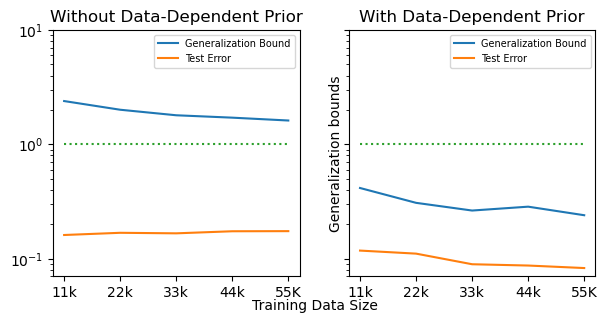

In [22]:
plot_loc = folder_path + 'generalization_bound_vs_datasize_mnist_no_prior.pdf'
fig, (ax2, ax3) = plt.subplots(1, 2, sharey=True, figsize=(7,3.2))
#fig.suptitle(f'Generalization Bounds for {len(layer_dims)+1} Layer network of widths = {layer_dims}')
#ax1.plot(data_sizes, best_zero_bound, label=f'Generalization Bound') 
#ax1.plot(data_sizes, template, linestyle='dashed', label=C_str) 
#ax1.plot(data_sizes, all_test_error, label=r'Test Error')
#ax1.plot(data_sizes, vacuous, linestyle='dotted')
#ax1.set_ylabel(r'Generalization bounds')
#ax1.set_title('No regularization')
#ax1.set_yscale('log') #yscale('log')
labels = ['11k', '22k', '33k', '44k', '55K']
#ax1.set_xticks(data_sizes, labels)

#ax1.set_xticks([0, 10^3, 20k, 30k, 40k, 50k])
ax2.plot(data_sizes, best_zero_bound_reg, label=f'Generalization Bound') 
#ax2.plot(data_sizes, template, linestyle='dashed', label=C_str) 
ax2.plot(data_sizes, all_test_error_reg, label=r'Test Error')
ax2.plot(data_sizes, vacuous, linestyle='dotted')
ax2.set_xticks(data_sizes, labels)
ax2.set_title('Without Data-Dependent Prior')
ax2.set_yscale('log') #yscale('log')

ax3.plot(data_sizes, best_zero_bound_pt, label=f'Generalization Bound') 
#ax1.plot(data_sizes, template, linestyle='dashed', label=C_str) 
ax3.plot(data_sizes, all_test_error_pt, label=r'Test Error')
ax3.plot(data_sizes, vacuous, linestyle='dotted')
ax3.set_ylabel(r'Generalization bounds')
ax3.set_title('With Data-Dependent Prior')
ax3.set_yscale('log') #yscale('log')
ax3.set_xticks(data_sizes, labels)

fig.text(0.5, 0.005, 'Training Data Size', ha='center')
#plt.xlabel(r'Training Data Size')
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
    #      fancybox=True, shadow=True, ncol=3)
#fig.text(2.5, 0.02, 'Gen Bounds', ha='center')
t = plt.gca()
#ax.set_xlim([xmin, xmax])
#ax1.set_ylim([0, 35])
ax2.set_ylim([0, 10])
ax3.set_ylim([0, 10])
#ax1.legend(prop={'size': 7})
ax2.legend(prop={'size': 7})
ax3.legend(prop={'size': 7})
plt.savefig(plot_loc, bbox_inches='tight')

In [ ]:
plt.figure()
    plt.plot(data_sizes, best_zero_bound, label=f'Generalization Bound') 
    plt.plot(data_sizes, template, linestyle='dashed', label=C_str) 
    plt.plot(data_sizes, all_test_error, label=r'Test Error')
    plt.plot(data_sizes, vacuous, linestyle='dotted')
    #plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'Generalization bounds')
    plt.xlabel(r'Training Data Size')
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
    #      fancybox=True, shadow=True, ncol=3)
    plt.title(f'Generalization Bounds for {len(layer_dims)+1} Layer network of widths = {layer_dims}')
    ax = plt.gca()
    #ax.set_xlim([xmin, xmax])
    ax.set_ylim([0, 15])
    plt.legend(prop={'size': 7})
    plt.savefig(plot_loc, bbox_inches='tight')